In [29]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [30]:
data = pd.read_csv("../Documents/Mmaster.csv.csv")

In [31]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,671,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,female,15-24 years,14,289700,483,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1988,male,15-24 years,17,319200,533,Albania1988,NaN,"2,126,000,000",769,Generation X
3,Albania,1988,female,15-24 years,8,295600,271,Albania1988,NaN,"2,126,000,000",769,Generation X
4,Albania,1989,male,15-24 years,12,323500,371,Albania1989,NaN,"2,335,124,988",833,Generation X


In [32]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [33]:
europe = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'] 
asia = ['Armenia', 'Bahrain', 'Israel', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Macau', 'Maldives', 'Mongolia', 'Oman', 'Philippines', 'Qatar', 'Republic of Korea', 'Singapore', 'Sri Lanka', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan']
america = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Grenada', 'Guatemala', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'United States']
africa = ['Cabo Verde', 'Mauritius', 'Seychelles', 'South Africa'] 

                 

In [34]:
continents = {country: 'Asia' for country in asia}
continents.update({country: 'Europe' for country in europe})
continents.update({country: 'Africa' for country in africa})
continents.update({country: 'America' for country in america})


In [35]:
data['Continent'] = data['country'].map(continents)

In [36]:
data.shape

(27820, 13)

In [37]:
# data.groupby('Year').sum()
data['suicides_no']
data = data.groupby('year').sum()
data['suicides_no']

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256119
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
2016     15603
Name: suicides_no, dtype: int64

In [38]:
sea.color_palette("hls", 8)
plt.close()

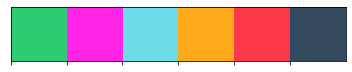

In [39]:
flatui = ["#2ecc71", "#ff23e5", "#6cdae7", "#ffaa1d", "#fd3a4a", "#34495e"]
sea.set_palette(flatui)
sea.palplot(sea.color_palette())

Text(0.5, 0, 'Year')

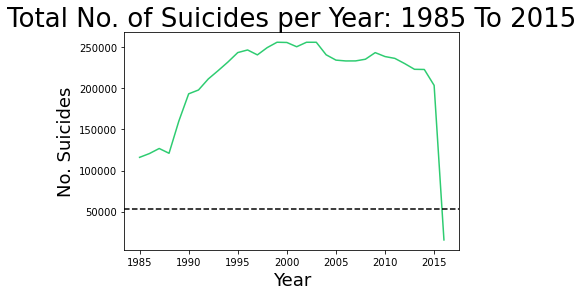

In [40]:
#Total suicides, with average line
data['suicides_no'].plot()
plt.title('Total No. of Suicides per Year: 1985 To 2015', fontsize = 26)
plt.axhline(y=52720, color='black', linestyle='--')
plt.ylabel('No. Suicides', fontsize = 18)
plt.xlabel('Year', fontsize = 18)          

In [15]:
#plot mean suicides/year by continent
ax = data_per_continent['suicides_no'].plot(kind='bar', figsize=(10, 5), fontsize=8)
plt.title('Mean Suicides/Year by Continent', fontsize = 10)
ax.set_xlabel("Continent", fontsize=10)
plt.show()

NameError: name 'data_per_continent' is not defined

In [16]:
#plot suicide rate vs gdp
plt.figure(figsize=(20,16))
sea.scatterplot(x='sex', y='suicides_no', hue='Continent') 
plt.title('Suicide Rates: 2000', fontsize= 22)
plt.ylabel('Suicide Rate ', fontsize = 22)
plt.xlabel('gender', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=1, prop={'size': 30})


plt.show()

ValueError: Could not interpret value `sex` for parameter `x`

<Figure size 1440x1152 with 0 Axes>

In [17]:
#Which year has the most Suicides ? Which year has the least Suicides ?

data['suicides_no'] = data['suicides_no'].replace(0,np.NAN)

mean_value=data['suicides_no'].mean()
data['suicides_no']=data['suicides_no'].fillna(mean_value)

def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    #print the Year with high and low suicide
    print("Year Which Has Highest "+ x + " : ",data['year'][high_index])
    print("Year Which Has Lowest "+ x + "  : ",data['year'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('suicides_no')

KeyError: 'year'

In [18]:
#Are certain age groups more inclined to suicide?
sample = data.sample(20)
sample

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),AgeNum
year,,,,,,
2016,15603,132101896,200447,0.0,4106420,6560
1986,120670,1029909613,591492,0.0,4104636,20160
2010,238702,1997297329,1074779,749568.0,25193196,36960
2000,255832,1799227908,1284998,636696.0,12865476,36120
2001,250652,1755565489,1305113,0.0,12677892,36960
2014,222984,1912057309,956027,629712.0,25665252,32760
1992,211473,1569539447,971807,0.0,8195232,27300
1993,221565,1530416654,986032,0.0,8231796,27300
1991,198020,1489988384,959845,0.0,7782096,26880


In [67]:
sea.catplot(x="suicides_no", y="year",palette="ch:.25", kind="bar",data=data);

plt.title('year vs.suicides_no',size=40)
plt.xlabel('suicides_no',size=36)
plt.ylabel('year',size=36)

#The data illustrates that middle aged adults, between the ages of 30 through 60, have the highest suicide count. While elderly and adolescents have about half the amount as middle aged adults.

ValueError: Could not interpret input 'year'

In [35]:
#What sex group has the highest suicide rate?
#What age group has the highest suicide rate?
#Is there a correlation between Suicide/100k of population and GDP per capita ?
#Is there any anomalies present ?

by_sex = data.groupby(['sex']).mean().sort_values('suicides', ascending=True).reset_index()
by_sex_Time = data.groupby(['sex','year']).mean().sort_values('suicides', ascending=True).reset_index()
by_sex_Age = data.groupby(['sex','age']).mean().sort_values('suicides', ascending=True).reset_index()
by_sex_Gen = data.groupby(['sex','generation']).mean().sort_values('suicides', ascending=True).reset_index()

KeyError: 'sex'

ValueError: Could not interpret input 'suicides_no'

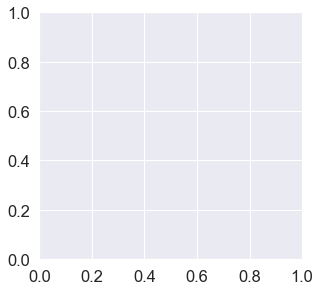

In [41]:
plt.figure(figsize=(16,10))

plt.subplot(231)
sea.barplot(x='suicides_no',y='sex', alpha=0.7,  ci='sd')
plt.gca().xaxis.tick_bottom()
plt.title('Average Suicides by year \nFrom 1987 to 2015')



In [22]:
data['clusters'] = clusters

NameError: name 'clusters' is not defined

In [23]:
data.sample(10)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),AgeNum
year,,,,,,
2004,240861,1745246613,1142323,0.0,17895936,35280
2012,230160,1912812088,993875,688992.0,26058300,34020
2014,222984,1912057309,956027,629712.0,25665252,32760
1990,193361,1466620100,881414,397188.0,7531260,26880
1988,121026,1054094424,673567,0.0,5870508,20580
1996,246725,1662267662,1275216,0.0,11600736,32340
2000,255832,1799227908,1284998,636696.0,12865476,36120
2009,243487,1976228366,1097184,0.0,24145248,37380
1986,120670,1029909613,591492,0.0,4104636,20160


In [24]:
data.head()

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),AgeNum
year,,,,,,
1985,116063,1008600086,617145,295092.0,3508548,20160
1986,120670,1029909613,591492,0.0,4104636,20160
1987,126842,1095029726,691734,0.0,5645760,22680
1988,121026,1054094424,673567,0.0,5870508,20580
1989,160244,1225514347,731366,0.0,6068424,21840


In [25]:
from sklearn.cluster import KMeans

In [26]:
from sklearn.cluster import KMeans
def elbow_plot(data, maxK=10, seed_centroids=None):
    """
        parameters:
        - data: pandas DataFrame (data to be fitted)
        - maxK (default = 10): integer (maximum number of clusters with which to run k-means)
        - seed_centroids (default = None ): float (initial value of centroids for k-means)
    """
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return



In [27]:
sea.catplot(x="sex", y="suicides_no", hue="AgeCategory", kind="bar", data=data);

ValueError: Could not interpret input 'sex'

In [28]:
def mapWorld(col1,size2,title3,label4,metr=100,colmap='hot'):
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-110,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full[col1].values
    if size2:
        a_2 = data_full[size2].values
    else: a_2 = 1
    m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,linewidth=1,edgecolors='black',cmap=colmap, alpha=1)
    
    cbar = m.colorbar()
    cbar.set_label(label4,fontsize=30)
    plt.title(title3, fontsize=30)
    plt.show()
sea.set(font_scale=1.5)
plt.figure(figsize=(15,15))
mapWorld(col1='suicides_no', size2=False,title3='Suicide count',label4='',metr=300,colmap='viridis')

NameError: name 'Basemap' is not defined

<Figure size 1080x1080 with 0 Axes>

In [29]:
suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby(data['sex']).sum())
suic_sum_yr = suic_sum_yr.reset_index().sort_index(by='suicides_no',ascending=False)
most_cont_yr = suic_sum_yr
fig = plt.figure(figsize=(30,10))
plt.title('Count of suicides for years.')
sns.set(font_scale=2.5)
sns.barplot(y='suicides_no',x='year',data=most_cont_yr,palette="OrRd");
plt.ylabel('Count of suicides')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()



KeyError: 'sex'

In [30]:
data["year"] = pd.to_datetime(data["year"], format = "%Y")
data = df.groupby(["year", "sex"]).agg("mean").reset_index()
sea.lineplot(x = "year", y = "suicides/100k pop", hue = "sex", data = df)
plt.xlim("1985", "2015")
plt.title("Evolution of the mean suicides number per 100k population (1985 - 2015)");


KeyError: 'year'

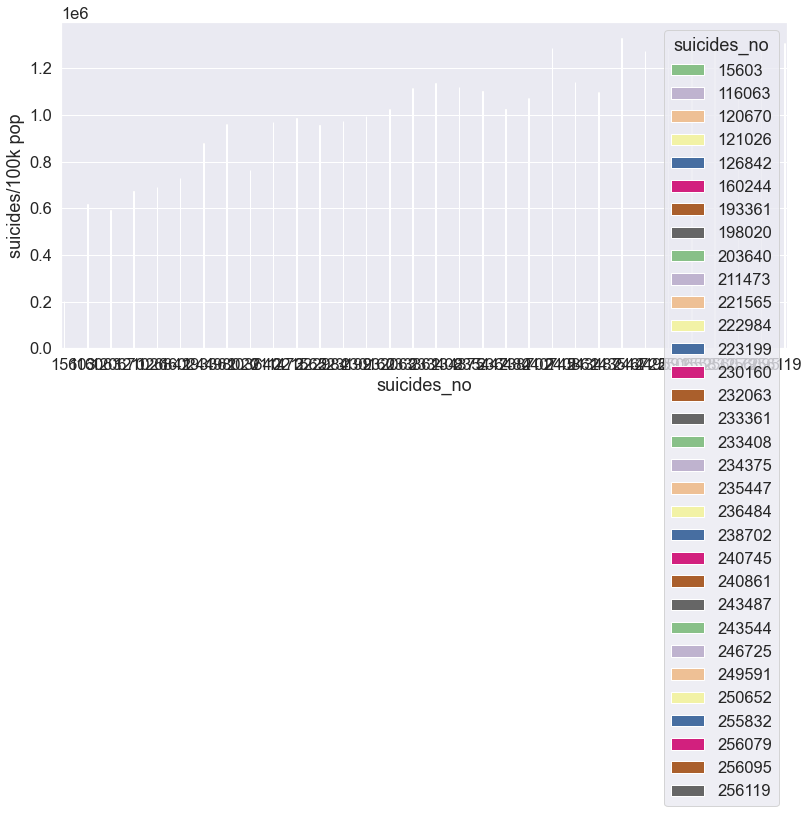

In [31]:
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sea.barplot(x = 'suicides_no', y = 'suicides/100k pop',
                  hue='suicides_no',data=data, palette='Accent')


In [32]:
#yılara göre intihar sayıları -yüksekten düşüğe
year_suicides = data.groupby('year')[['suicides_no']].sum().reset_index()
year_suicides.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Greens', subset=['suicides_no'])

,year,suicides_no
14,1999,256119
17,2002,256095
18,2003,256079
15,2000,255832
16,2001,250652
13,1998,249591
11,1996,246725
10,1995,243544
24,2009,243487
19,2004,240861


In [33]:
def find_minmax(x):
     #use the function 'idmin' to find the index of lowest suicide
    min_index = data[x].idxmin()
    #use the function 'idmax' to find the index of Highest suicide
    high_index = data[x].idxmax()
    
    high = pd.DataFrame(data.loc[high_index,:])
    low = pd.DataFrame(data.loc[min_index,:])
    
    

find_minmax('suicides_no')

In [237]:
m = data['sex']
n = data['age']
o = data['suicides_no']
p = data['population']
q = data['suicide/100k pop']
r = sdata['GDP_per_capita $']

sea.pairplot(pd.DataFrame(list(zip(m, n, np.log(o), np.log10(p), q, r)), 
                        columns=['sex','age', 'suicides_no', 'population', 'suicides/100k Pop', 
                                 'GDP_Per_Capita$']), hue='Sex', palette="husl");

KeyError: 'sex'

In [242]:
#plot suicide rate vs gdp
plt.figure(figsize=(20,16))
sea.scatterplot(x='gdp_for_year ($)',s=300, y='suicides/100k Pop',data=data, hue='Continent') 
plt.title('Suicide Rates: 2015', fontsize= 30)
plt.ylabel('Suicide Rate /100k Population', fontsize = 22)
plt.xlabel('GDP ($)', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=1, prop={'size': 30})
plt.show()

ValueError: Could not interpret value `gdp_for_year ($)` for parameter `x`

<Figure size 1440x1152 with 0 Axes>

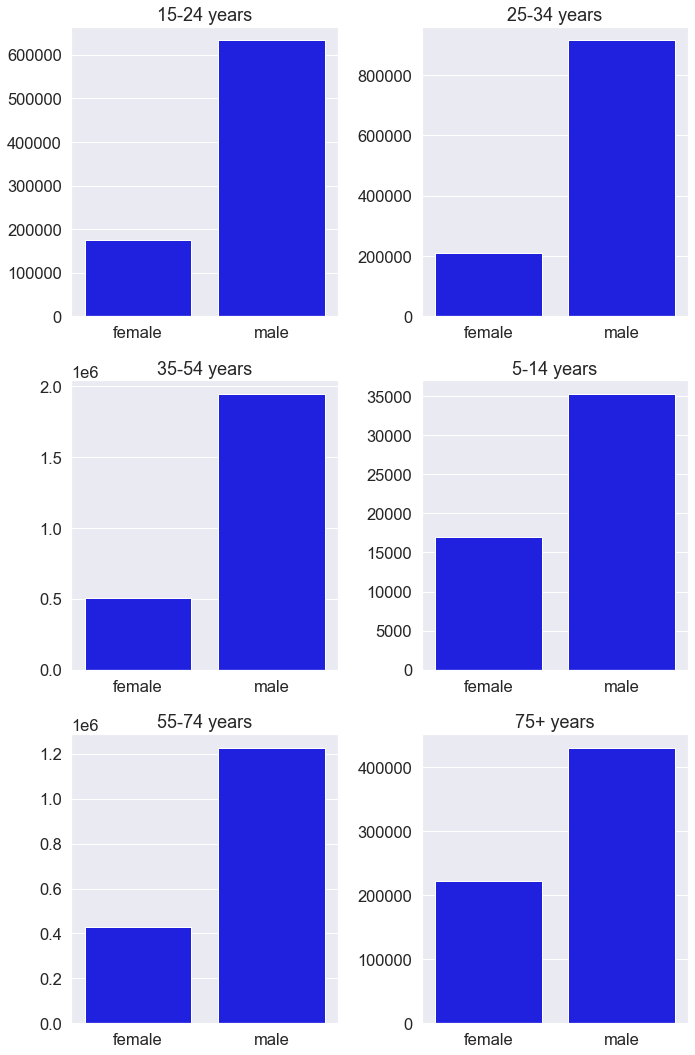

In [243]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sea.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show() 

C:\Users\asuss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\asuss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


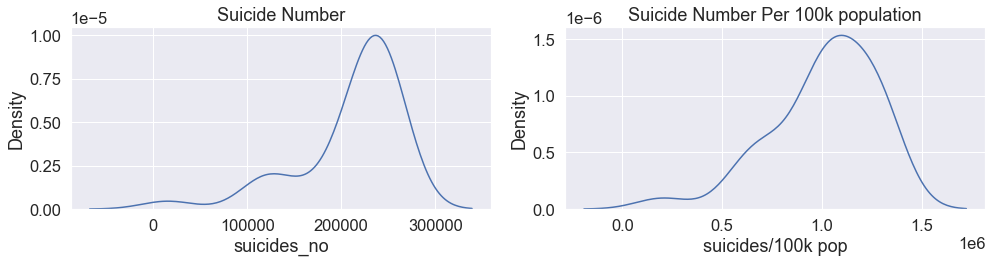

In [244]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Suicide Number')
sea.distplot(data['suicides_no'], hist=False)
plt.subplot(122)
plt.title('Suicide Number Per 100k population')
sea.distplot(data['suicides/100k pop'], hist=False)
plt.tight_layout()

In [245]:
from bokeh.layouts import gridplot
from bokeh.palettes import Category20

In [246]:
data = data.groupby(['country', 'year']).sum().suicides_no

country_dict = dict(european_countries=['Russian Federation', 'Ukraine','France', 'Germany', 'United Kingdom', 'Sweden', 'Denmark', 'Norway', 'Poland','Lithuania','Italy','Spain'],
                    north_south_american_countries=['Canada', 'United States', 'Mexico', 'Guatemala', 'Panama', 'Colombia', 'Ecuador', 'Argentina', 'Brazil'],
                    east_southeast_asian_countries=['Japan','Republic of Korea','Thailand', 'Sri Lanka', 'Philippines', 'Singapore'])



KeyError: 'country'

In [248]:
data = data.groupby([ 'country', 'year']).sum().suicides_no

KeyError: 'country'

In [273]:
data.head(5)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),AgeNum
year,,,,,,
1985,116063,1008600086,617145,295092.0,3508548,20160
1986,120670,1029909613,591492,0.0,4104636,20160
1987,126842,1095029726,691734,0.0,5645760,22680
1988,121026,1054094424,673567,0.0,5870508,20580
1989,160244,1225514347,731366,0.0,6068424,21840


In [276]:
#nüfus başına intiharr oranı

data['suicide_per_pop'] = data['suicides_no']/data['population']

data.tail(10)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),AgeNum,suicide_per_pop
year,,,,,,,
2007,233408,1859564353,1137119,0.0,24709620,36120,0.000126
2008,235447,1860620851,1101715,0.0,26936208,35700,0.000127
2009,243487,1976228366,1097184,0.0,24145248,37380,0.000123
2010,238702,1997297329,1074779,749568.0,25193196,36960,0.000120
2011,236484,1993362332,1024644,706212.0,26936148,36120,0.000119
2012,230160,1912812088,993875,688992.0,26058300,34020,0.000120
2013,223199,1890161710,975302,656916.0,26911368,33600,0.000118
2014,222984,1912057309,956027,629712.0,25665252,32760,0.000117
2015,203640,1774657932,766053,0.0,19516008,26040,0.000115


In [279]:
data=data.drop(['suicides_no'],axis=1)

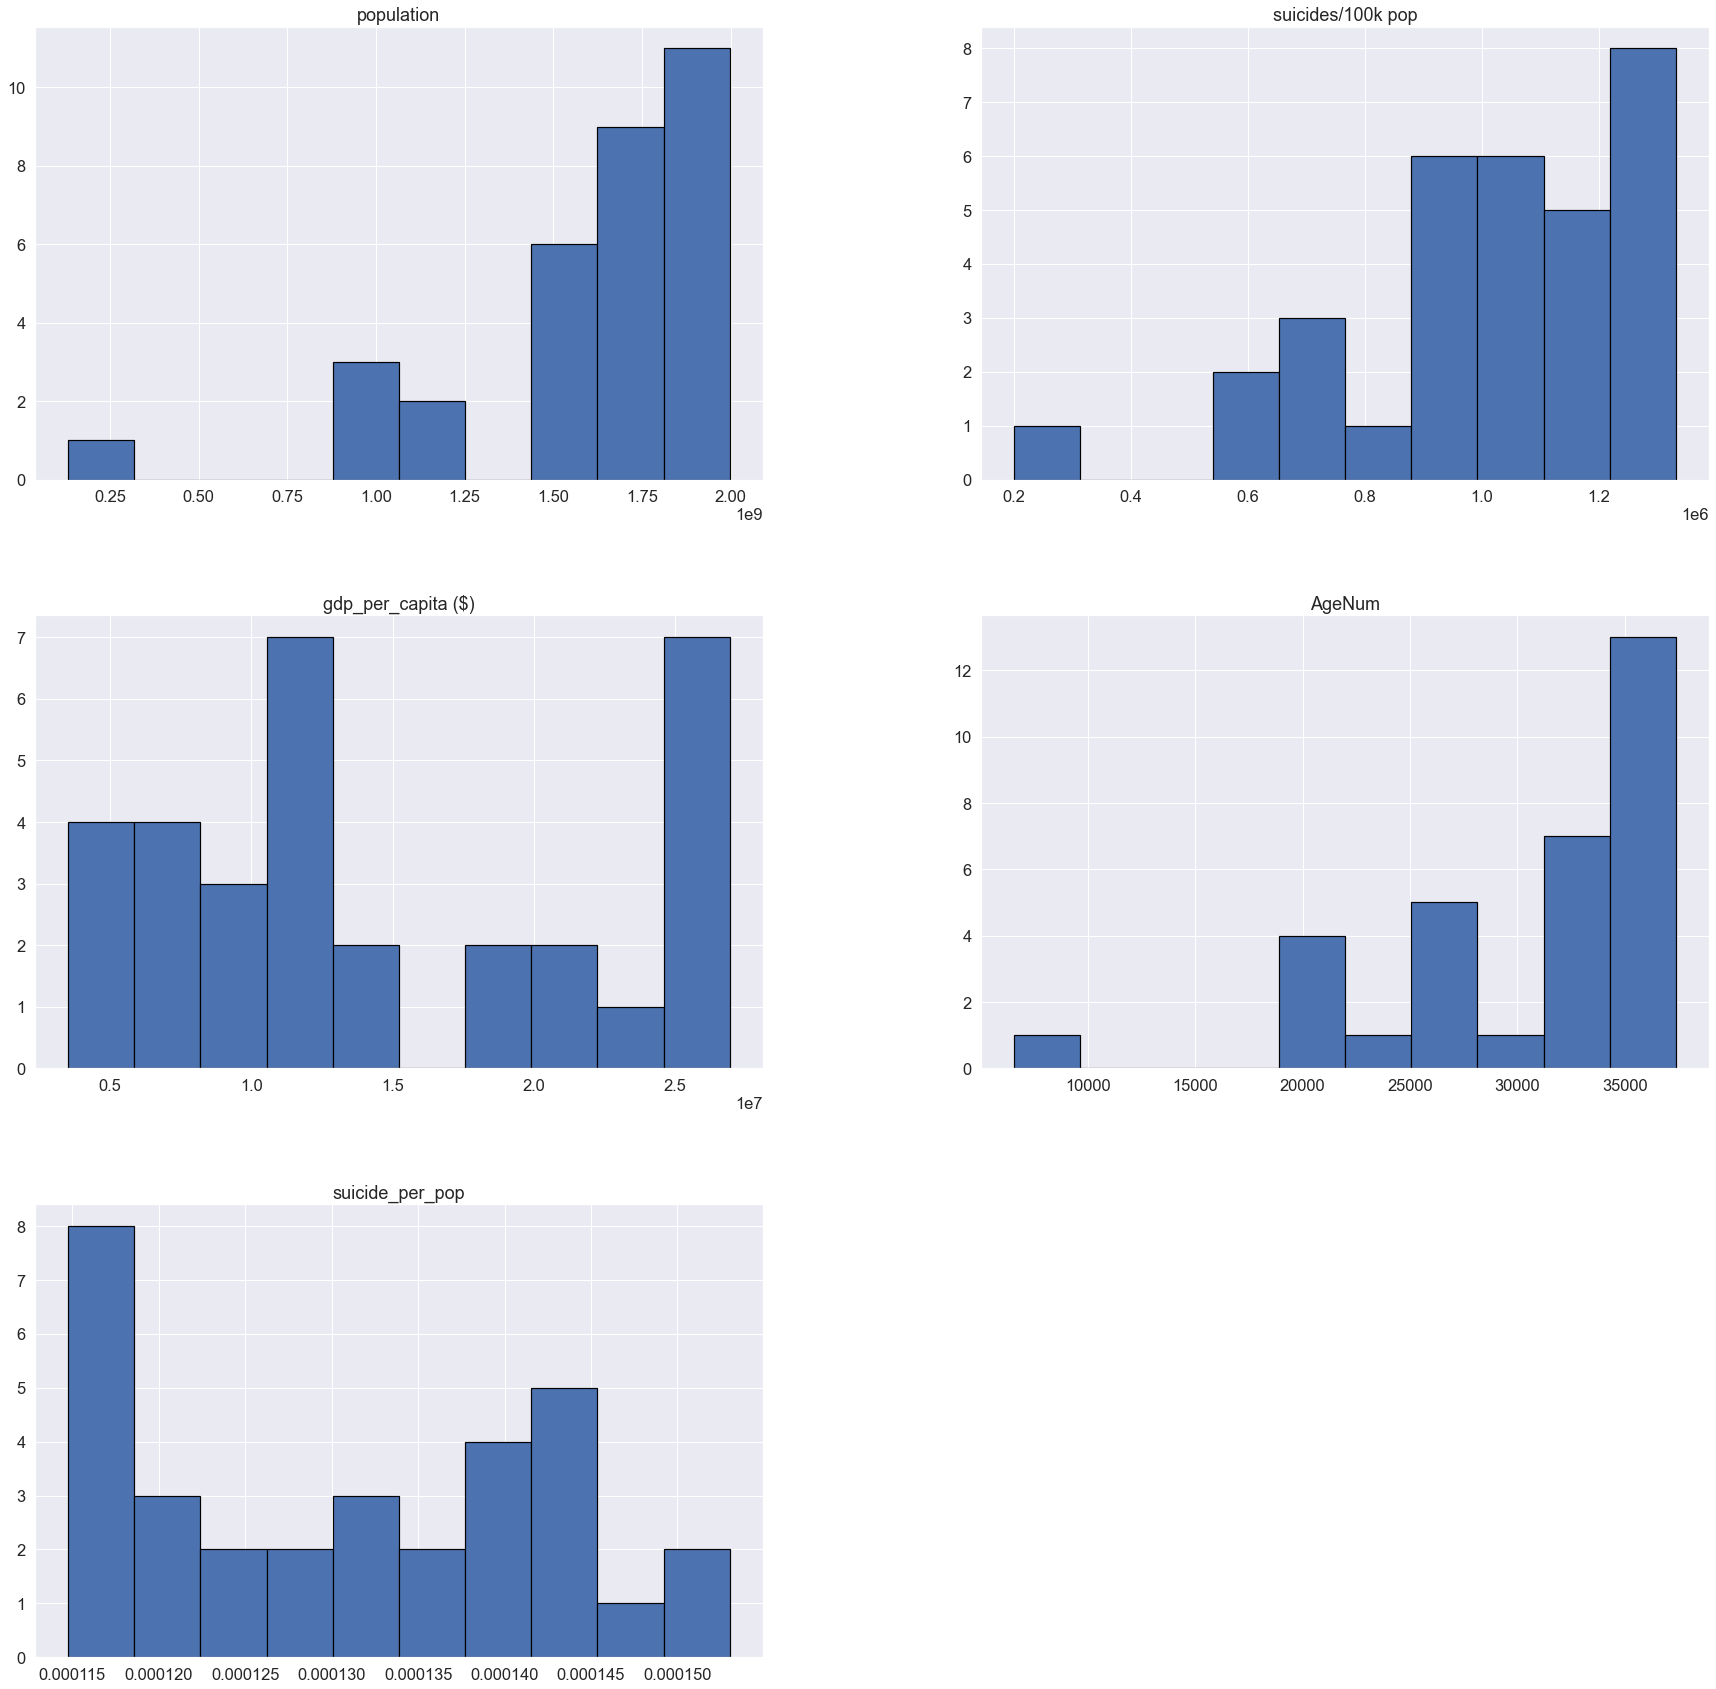

In [280]:
data.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

In [284]:
#Belirli yaş grupları intihara daha mı meyilli?

sample = data.sample(8)

In [289]:
sample

,population,suicides/100k pop,gdp_per_capita ($),AgeNum,suicide_per_pop
year,,,,,
1987,1095029726,691734,5645760,22680,0.000116
2014,1912057309,956027,25665252,32760,0.000117
2005,1734909645,1120046,20317212,35280,0.000135
2010,1997297329,1074779,25193196,36960,0.000120
1992,1569539447,971807,8195232,27300,0.000135
2013,1890161710,975302,26911368,33600,0.000118
1986,1029909613,591492,4104636,20160,0.000117
1990,1466620100,881414,7531260,26880,0.000132


In [290]:
 # grabs first 2 chars from Age Column
data['AgeNum'] = data['AgeNum'].str[:2]

# remove all instances of dash -
data['AgeNum'] = data['AgeNum'].map(lambda x: x.replace('-',''))

# now, convert it to type int (not Object)
data['AgeNum'] = data['AgeNum'].astype(int)

data['AgeNum'].tail(3)

AttributeError: Can only use .str accessor with string values!

C:\Users\asuss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


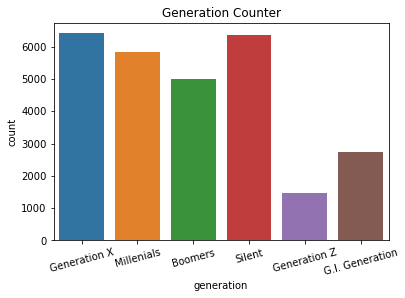

In [6]:
sea.countplot(data.generation)
plt.title('Generation Counter')
plt.xticks(rotation=15)
plt.show()

C:\Users\asuss\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


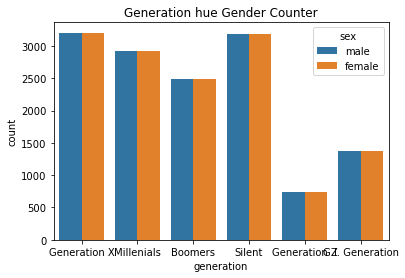

In [7]:
sea.countplot(data.generation,hue=data.sex)
plt.title('Generation hue Gender Counter')
plt.show()

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

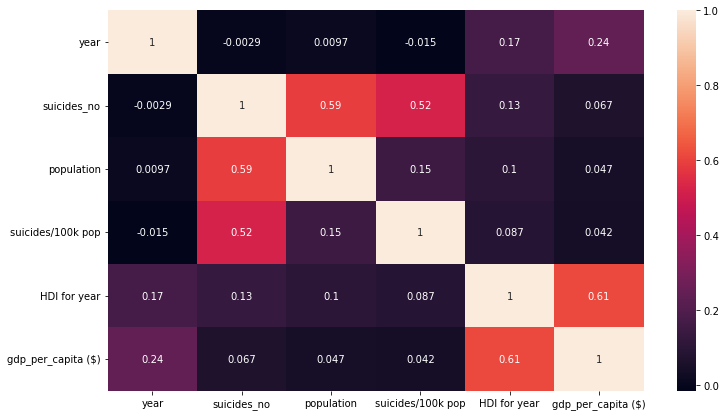

In [8]:
corr = data.corr(method='kendall')
plt.figure(figsize=(12,7))
sea.heatmap(corr, annot=True)
data.columns